Name: Minhas Ahmed

In [7]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

Problem 01: Employee Performance and Salary Analysis

# Part (A): 

Dataset Creation

In [4]:


random.seed(42)


num_employees = 500
departments = ["Sales", "HR", "IT", "Finance", "Marketing"]
genders = ["Male", "Female"]


employee_data = {
    "Employee ID": [f'EMP{str(i).zfill(3)}' for i in range(1, num_employees + 1)],
    "Name": [f'Employee {i}' for i in range(1, num_employees + 1)],  
    "Age": [random.randint(22, 60) for _ in range(num_employees)],
    "Gender": [random.choice(genders) for _ in range(num_employees)],
    "Department": [random.choice(departments) for _ in range(num_employees)],
    "Salary ($)": [random.randint(40000, 120000) for _ in range(num_employees)],
    "Years at Company": [random.randint(1, 30) for _ in range(num_employees)],
    "Performance Score": [random.randint(1, 5) for _ in range(num_employees)],
}


df = pd.DataFrame(employee_data)


df['Promotion Eligibility'] = df['Performance Score'].apply(lambda x: 'Yes' if x >= 4 else 'No')


print(df.head())

  Employee ID        Name  Age  Gender Department  Salary ($)  \
0      EMP001  Employee 1   29  Female         IT       80483   
1      EMP002  Employee 2   23    Male      Sales       63627   
2      EMP003  Employee 3   39    Male  Marketing       68074   
3      EMP004  Employee 4   37    Male      Sales       84791   
4      EMP005  Employee 5   36    Male  Marketing      103736   

   Years at Company  Performance Score Promotion Eligibility  
0                18                  1                    No  
1                16                  2                    No  
2                23                  2                    No  
3                19                  1                    No  
4                10                  1                    No  


# Part (B):

Data Cleaning and Transformation

In [6]:
np.random.seed(42)  
mask = np.random.rand(len(df)) < 0.1
df.loc[mask, 'Salary ($)'] = np.nan


mask = np.random.rand(len(df)) < 0.05
df.loc[mask, 'Performance Score'] = np.random.choice([-1, 6], size=len(df[mask]))


df['Salary ($)'] = df.groupby('Department')['Salary ($)'].transform(lambda x: x.fillna(x.median()))


df = df[(df['Performance Score'] >= 1) & (df['Performance Score'] <= 5)]

print(df.head())

  Employee ID        Name  Age  Gender Department  Salary ($)  \
0      EMP001  Employee 1   29  Female         IT     80483.0   
1      EMP002  Employee 2   23    Male      Sales     63627.0   
2      EMP003  Employee 3   39    Male  Marketing     68074.0   
3      EMP004  Employee 4   37    Male      Sales     84791.0   
4      EMP005  Employee 5   36    Male  Marketing    103736.0   

   Years at Company  Performance Score Promotion Eligibility  
0                18                  1                    No  
1                16                  2                    No  
2                23                  2                    No  
3                19                  1                    No  
4                10                  1                    No  


# Part (C):

Department-Wise Salary Analysis

  Department  Avg Salary ($)  Total Employees
0    Finance    83960.916667               96
1         HR    80057.696203               79
2         IT    79166.873786              103
3  Marketing    79426.520408               98
4      Sales    79697.188119              101
The department with the highest average salary is Finance with an average salary of $83960.92
Average salary of employees eligible for promotion: $82688.37
Average salary of employees not eligible for promotion: $78811.04


C:\Users\minha\AppData\Local\Temp\ipykernel_10848\1171044870.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


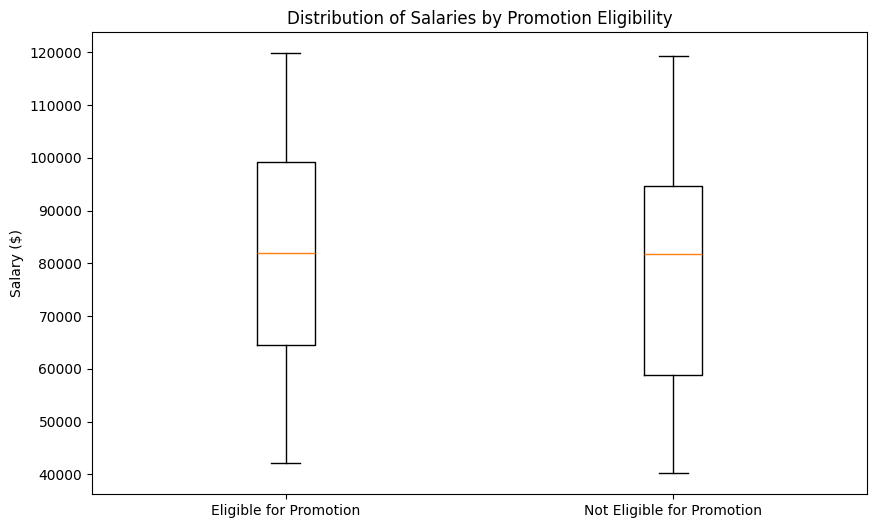

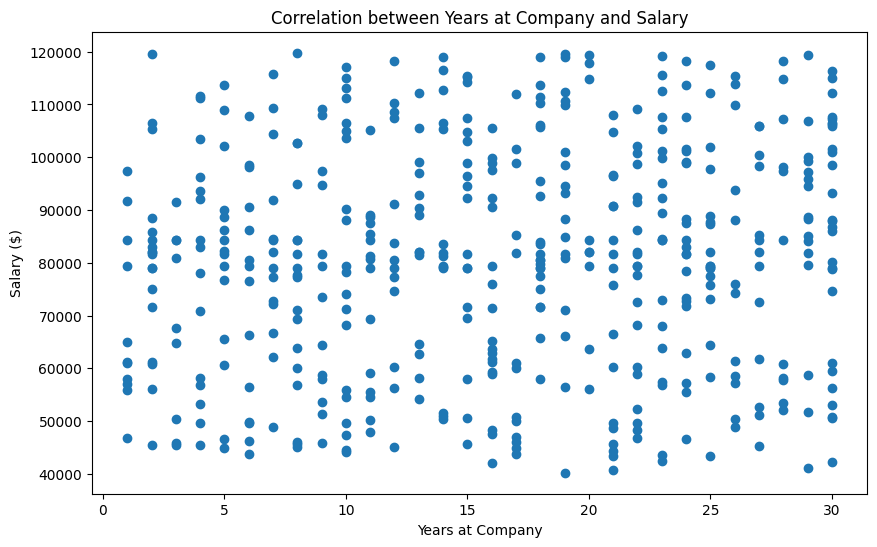

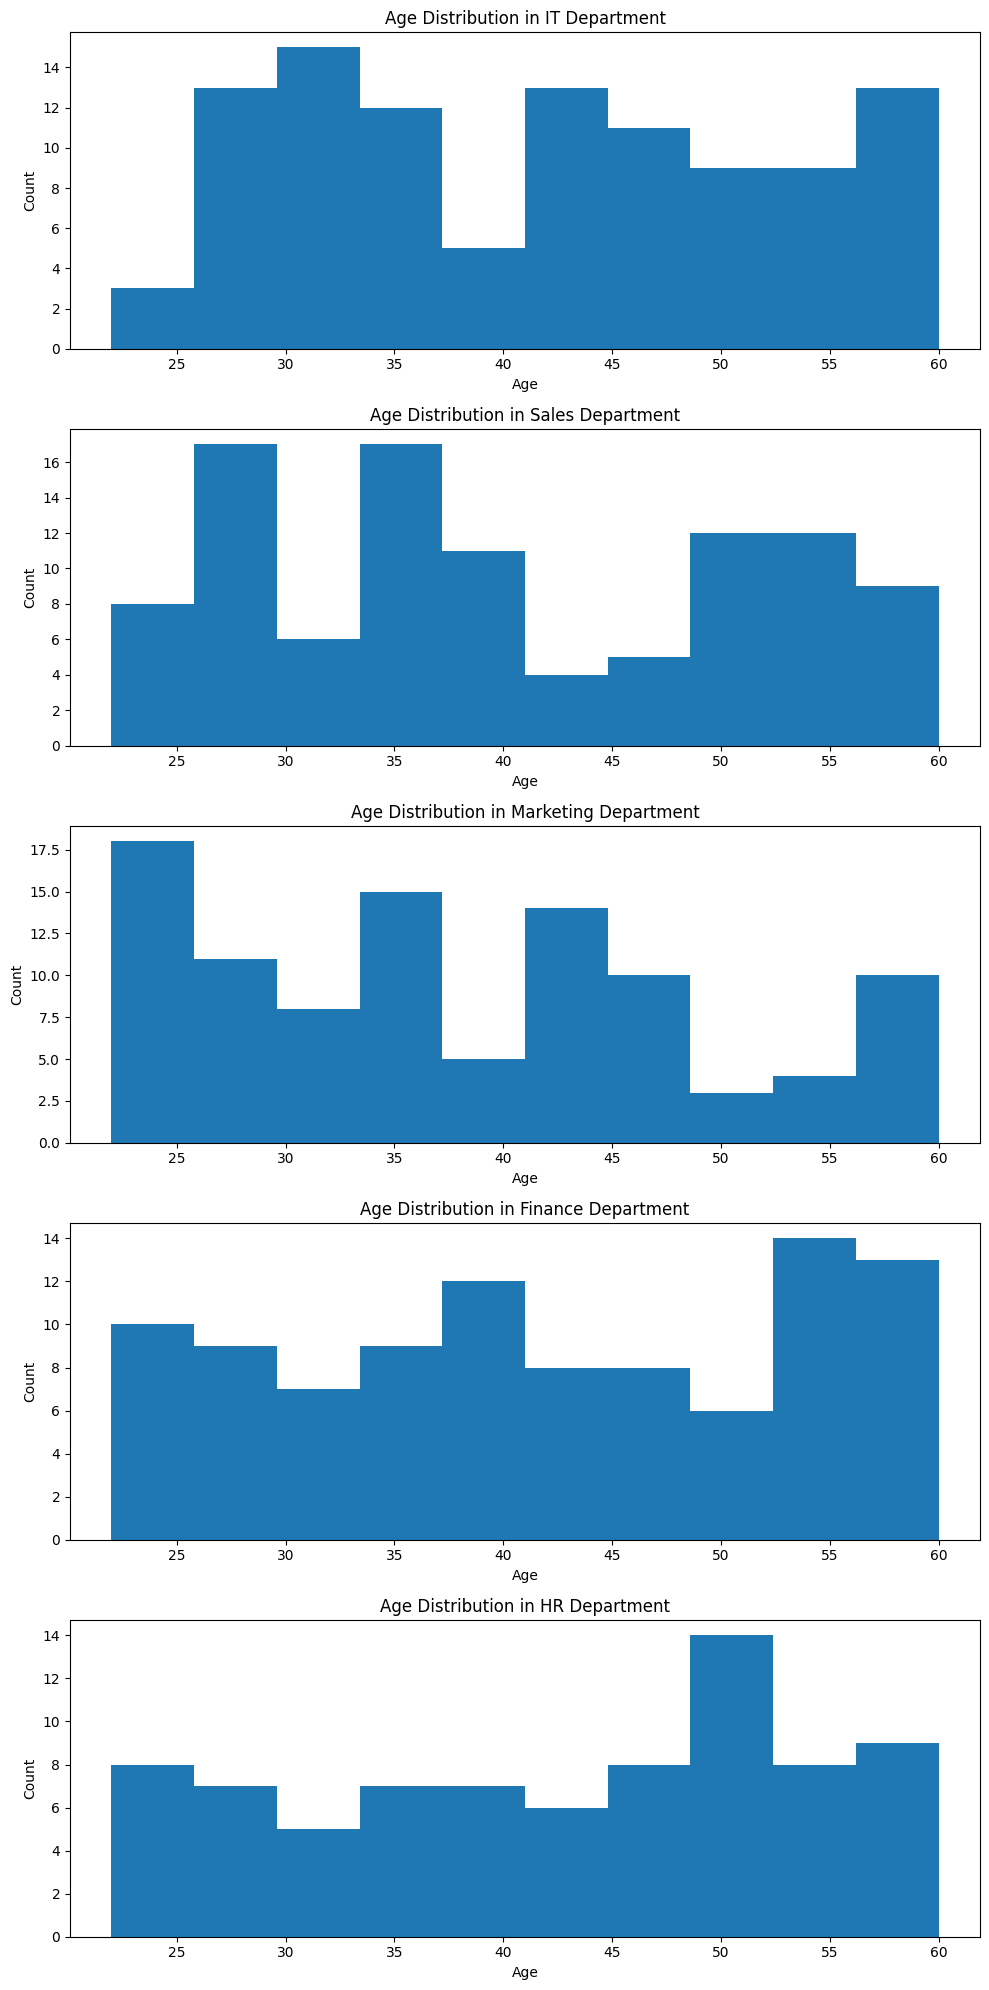

In [10]:
df_dept = df.groupby('Department')['Salary ($)'].agg(['mean', 'count']).reset_index()
df_dept.columns = ['Department', 'Avg Salary ($)', 'Total Employees']


print(df_dept)


max_salary_dept = df_dept.loc[df_dept['Avg Salary ($)'].idxmax()] 
print(f"The department with the highest average salary is {max_salary_dept['Department']} with an average salary of ${max_salary_dept['Avg Salary ($)']:.2f}")


avg_salary_promotion_yes = df.loc[df['Promotion Eligibility'] == 'Yes', 'Salary ($)'].mean()
avg_salary_promotion_no = df.loc[df['Promotion Eligibility'] == 'No', 'Salary ($)'].mean()

print(f"Average salary of employees eligible for promotion: ${avg_salary_promotion_yes:.2f}")
print(f"Average salary of employees not eligible for promotion: ${avg_salary_promotion_no:.2f}")


plt.figure(figsize=(10, 6))
plt.boxplot(
    [df.loc[df['Promotion Eligibility'] == 'Yes', 'Salary ($)'], 
     df.loc[df['Promotion Eligibility'] == 'No', 'Salary ($)']], 
    labels=['Eligible for Promotion', 'Not Eligible for Promotion']
)
plt.title('Distribution of Salaries by Promotion Eligibility')
plt.ylabel('Salary ($)')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(df['Years at Company'], df['Salary ($)'])
plt.title('Correlation between Years at Company and Salary')
plt.xlabel('Years at Company')
plt.ylabel('Salary ($)')
plt.show()

fig, axs = plt.subplots(len(df['Department'].unique()), figsize=(10, 20))
for i, dept in enumerate(df['Department'].unique()):
    axs[i].hist(df.loc[df['Department'] == dept, 'Age'], bins=10)
    axs[i].set_title(f'Age Distribution in {dept} Department')
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

# Part (D):

Visualization of Dataset


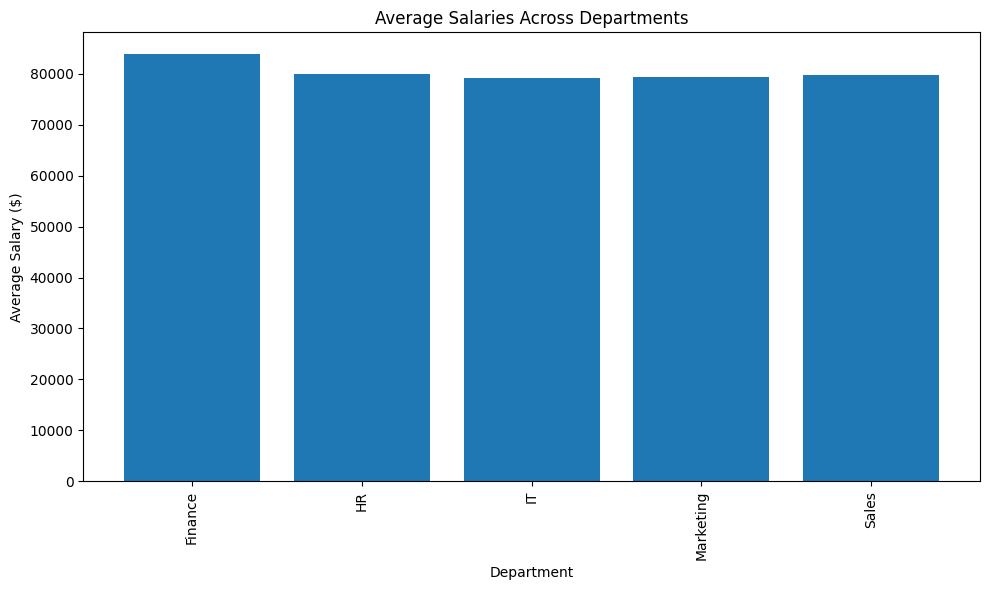

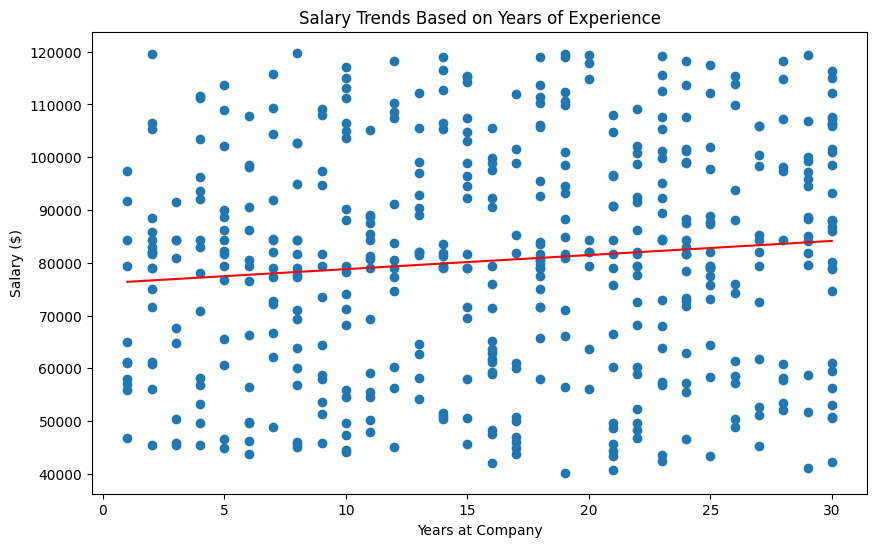

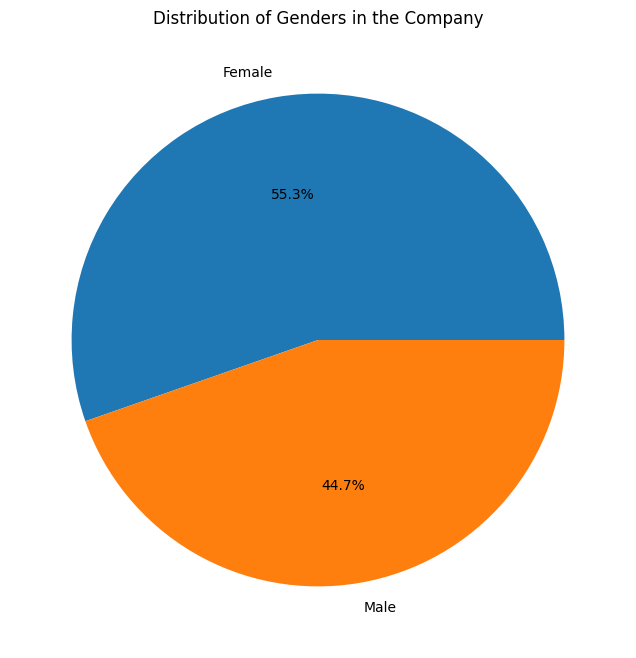

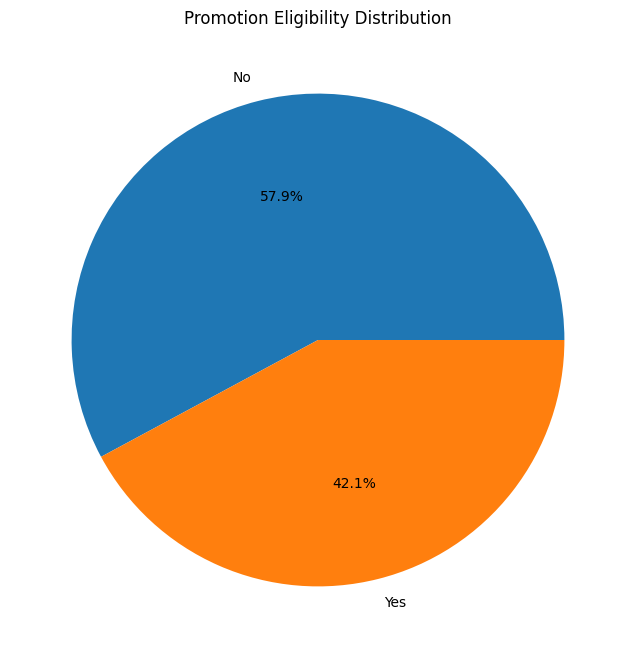

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(df_dept['Department'], df_dept['Avg Salary ($)'])
plt.title('Average Salaries Across Departments')
plt.xlabel('Department')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(df['Years at Company'], df['Salary ($)'])
plt.plot(np.unique(df['Years at Company']), np.poly1d(np.polyfit(df['Years at Company'], df['Salary ($)'], 1))(np.unique(df['Years at Company'])), color='red')
plt.title('Salary Trends Based on Years of Experience')
plt.xlabel('Years at Company')
plt.ylabel('Salary ($)')
plt.show()


plt.figure(figsize=(8, 8))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Genders in the Company')
plt.show()


plt.figure(figsize=(8, 8))
plt.pie(df['Promotion Eligibility'].value_counts(), labels=df['Promotion Eligibility'].unique(), autopct='%1.1f%%')
plt.title('Promotion Eligibility Distribution')
plt.show()

# Problem 02: “Numerical Stability in Linear Systems”

# Part (A): 

Matrix and Vector Generation

In [12]:
A = np.random.uniform(-10, 10, (5, 5))


b = np.random.uniform(-20, 20, 5)

print("Matrix A:\n", A)
print("Vector b:\n", b)

Matrix A:
 [[-8.96808387  3.39834929 -9.11669125  1.76527514  9.98706999]
 [ 1.11613163 -0.53579764 -3.74290287 -7.58954842  4.62047343]
 [-6.14801944 -7.69435958 -1.56474681  5.90683676  4.90129096]
 [-8.90234771 -0.8971263   0.44869152  2.89093301  3.00334701]
 [-2.70605501  1.21354388 -0.37876232  7.69996713  0.60530265]]
Vector b:
 [-2.35871353 -3.82058201  2.89711038 12.15907918  1.53605962]


# Part (B):

Solution Methods

In [13]:
x_explicit = np.linalg.inv(A).dot(b)


x_solve = np.linalg.solve(A, b)

print("Solution using Explicit Inversion:\n", x_explicit)
print("Solution using np.linalg.solve():\n", x_solve)

Solution using Explicit Inversion:
 [-0.79409456  0.54608712  2.92435538 -0.14443108  1.5599561 ]
Solution using np.linalg.solve():
 [-0.79409456  0.54608712  2.92435538 -0.14443108  1.5599561 ]


# Part (C):

Numerical Stability Analysis


In [14]:
discrepancy = np.linalg.norm(x_explicit - x_solve)
print(f"Discrepancy between solutions: {discrepancy}")


condition_number = np.linalg.cond(A)
print(f"Condition number of matrix A: {condition_number}")


if condition_number < 10:
    print("Matrix A is well-conditioned.")
elif condition_number < 1000:
    print("Matrix A is moderately conditioned.")
else:
    print("Matrix A is ill-conditioned.")

Discrepancy between solutions: 5.874748045952207e-16
Condition number of matrix A: 32.071955425338516
Matrix A is moderately conditioned.


# Part (D): 

Advanced Visualizations

In [16]:
from mpl_toolkits.mplot3d import Axes3D


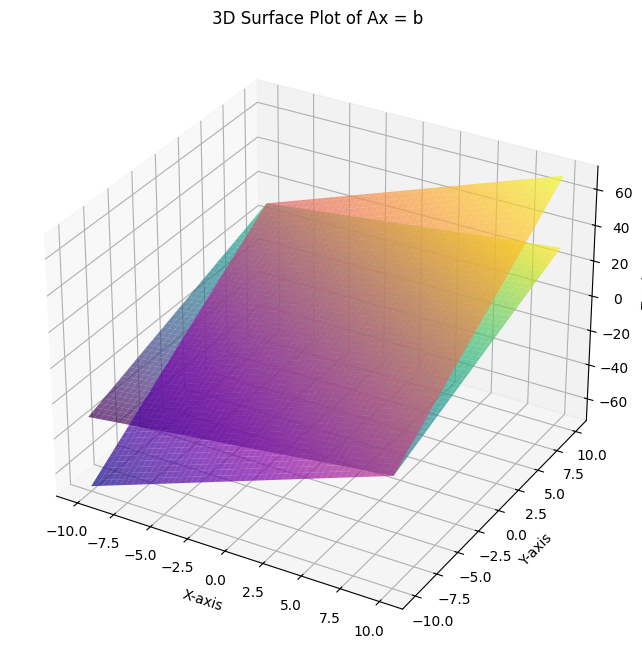

In [18]:
A = np.array([[1, 2], [3, 4]])
def f(x, y):
    return A[0, 0]*x + A[0, 1]*y, A[1, 0]*x + A[1, 1]*y

x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_range, y_range)


Z1 = np.zeros_like(X)
Z2 = np.zeros_like(X)
for i in range(len(X)):
    for j in range(len(X)):
        Z1[i, j], Z2[i, j] = f(X[i, j], Y[i, j])


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, cmap='viridis', alpha=0.7)
ax.plot_surface(X, Y, Z2, cmap='plasma', alpha=0.7)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Surface Plot of Ax = b')
plt.show()

Problem 03: “Exploring Climate Data Visualizations”

# 1- Dataset Creation

In [19]:
years = np.arange(1970, 2020)
avg_temp = np.random.normal(loc=14, scale=0.5, size=len(years))  
co2_levels = np.random.normal(loc=350, scale=15, size=len(years))  
sea_level_rise = np.random.normal(loc=0, scale=10, size=len(years))  


climate_data = pd.DataFrame({
    'Year': years,
    'Average Temperature (°C)': avg_temp,
    'CO2 Levels (ppm)': co2_levels,
    'Average Sea Level Rise (mm)': sea_level_rise
})


climate_data.head()


,Year,Average Temperature (°C),CO2 Levels (ppm),Average Sea Level Rise (mm)
0,1970,14.615081,348.693367,11.863874
1,1971,14.418031,364.181148,-2.363528
2,1972,12.676374,370.674122,-11.854200
3,1973,14.364771,360.253786,-3.988925
4,1974,13.890948,348.004129,7.704252


# 2- Line Plot of Average Temperature and CO2 Levels

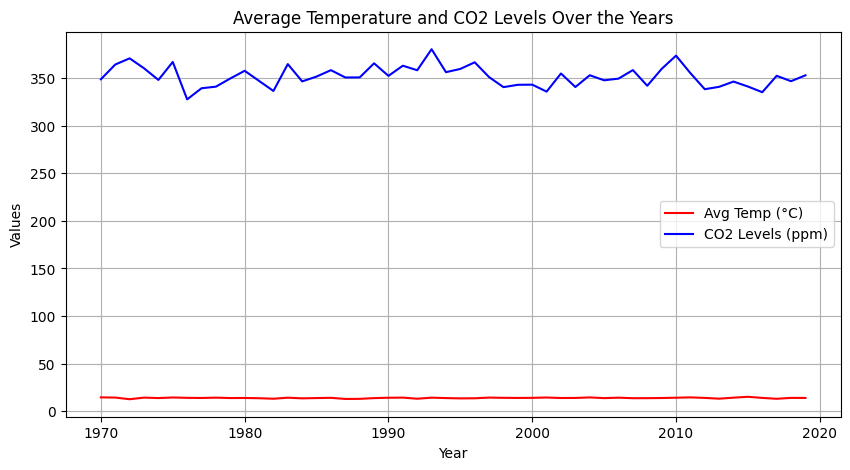

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(climate_data['Year'], climate_data['Average Temperature (°C)'], label='Avg Temp (°C)', color='red')
plt.plot(climate_data['Year'], climate_data['CO2 Levels (ppm)'], label='CO2 Levels (ppm)', color='blue')

plt.title('Average Temperature and CO2 Levels Over the Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# 3- Scatter Plot with Linear Regression 

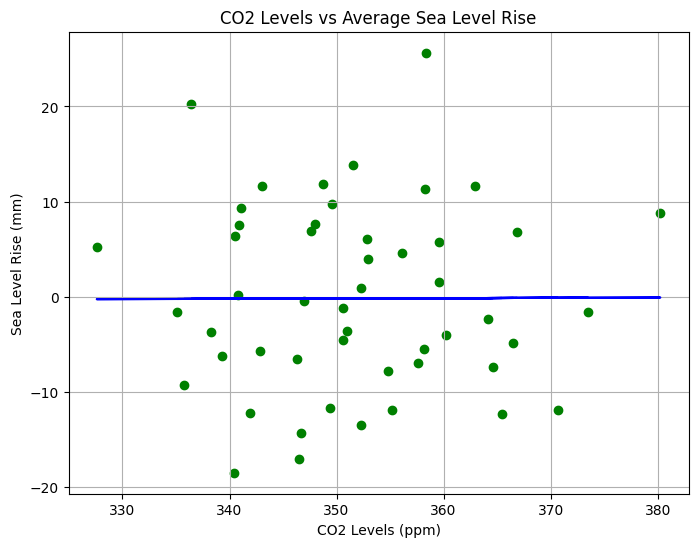

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(climate_data['CO2 Levels (ppm)'], climate_data['Average Sea Level Rise (mm)'], color='green')


coefficients = np.polyfit(climate_data['CO2 Levels (ppm)'], climate_data['Average Sea Level Rise (mm)'], 1)
poly_eqn = np.poly1d(coefficients)
plt.plot(climate_data['CO2 Levels (ppm)'], poly_eqn(climate_data['CO2 Levels (ppm)']), color='blue')

plt.title('CO2 Levels vs Average Sea Level Rise')
plt.xlabel('CO2 Levels (ppm)')
plt.ylabel('Sea Level Rise (mm)')
plt.grid(True)
plt.show()


# 4- Histogram of Average Temperature

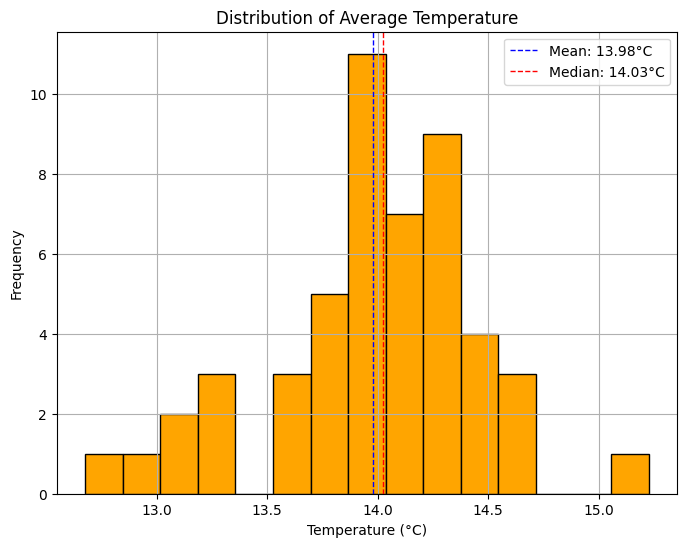

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(climate_data['Average Temperature (°C)'], bins=15, color='orange', edgecolor='black')

mean_temp = climate_data['Average Temperature (°C)'].mean()
median_temp = climate_data['Average Temperature (°C)'].median()
plt.axvline(mean_temp, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_temp:.2f}°C')
plt.axvline(median_temp, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_temp:.2f}°C')


plt.title('Distribution of Average Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


# 5- Box Plot for Sea Level Rise Across Decades

C:\Users\minha\AppData\Local\Temp\ipykernel_10848\1093349219.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sea_level_1970s, sea_level_2010s], labels=['1970s', '2010s'])


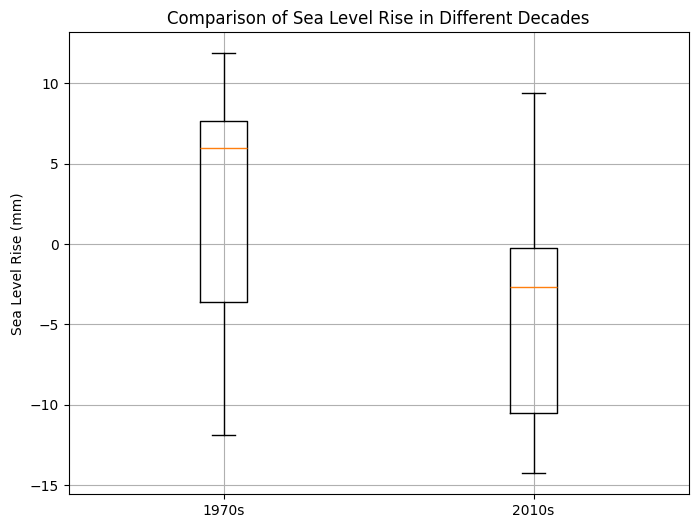

In [23]:
sea_level_1970s = climate_data[(climate_data['Year'] >= 1970) & (climate_data['Year'] < 1980)]['Average Sea Level Rise (mm)']
sea_level_2010s = climate_data[(climate_data['Year'] >= 2010) & (climate_data['Year'] < 2020)]['Average Sea Level Rise (mm)']


plt.figure(figsize=(8, 6))
plt.boxplot([sea_level_1970s, sea_level_2010s], labels=['1970s', '2010s'])


plt.title('Comparison of Sea Level Rise in Different Decades')
plt.ylabel('Sea Level Rise (mm)')
plt.grid(True)
plt.show()


# 6- Heatmap for Correlation Matrix

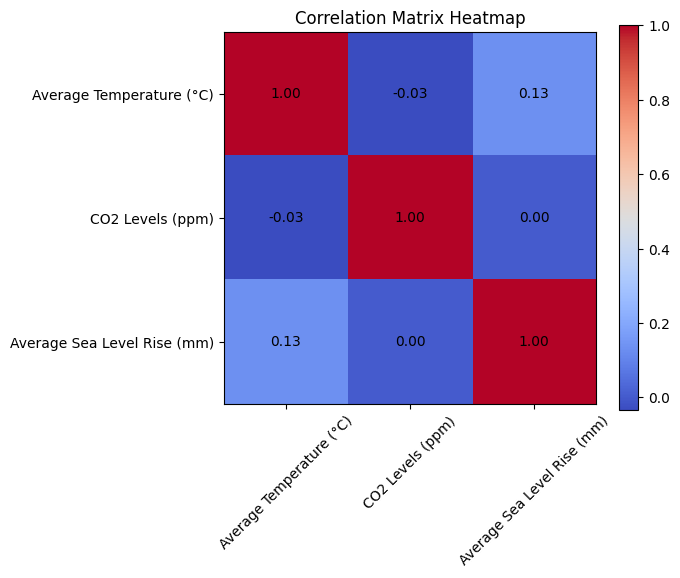

In [24]:
correlation_matrix = climate_data[['Average Temperature (°C)', 'CO2 Levels (ppm)', 'Average Sea Level Rise (mm)']].corr()


plt.figure(figsize=(6, 5))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)


for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix Heatmap')
plt.show()


# 7- 3D Scatter Plot

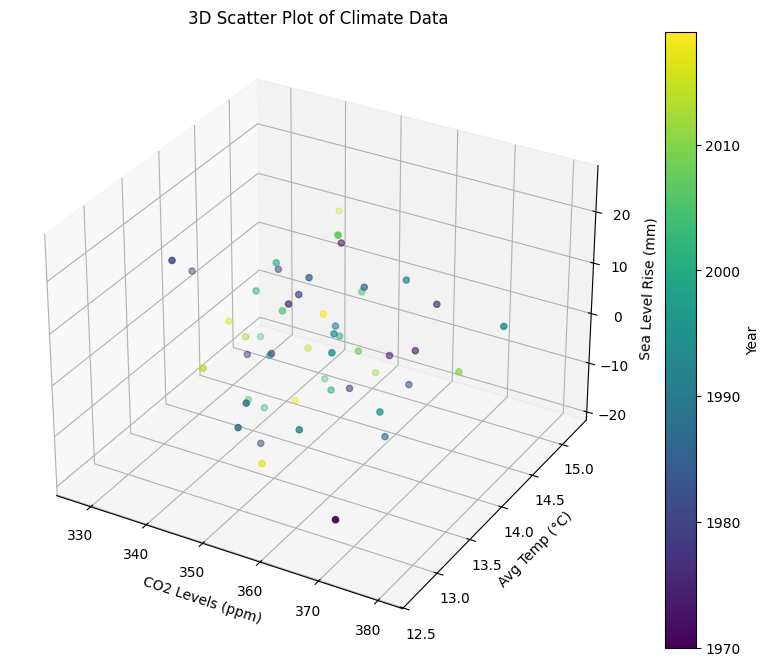

In [25]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(climate_data['CO2 Levels (ppm)'], climate_data['Average Temperature (°C)'], climate_data['Average Sea Level Rise (mm)'], 
                     c=climate_data['Year'], cmap='viridis')


ax.set_xlabel('CO2 Levels (ppm)')
ax.set_ylabel('Avg Temp (°C)')
ax.set_zlabel('Sea Level Rise (mm)')
plt.colorbar(scatter, ax=ax, label='Year')
plt.title('3D Scatter Plot of Climate Data')
plt.show()


# 8- Pie Chart

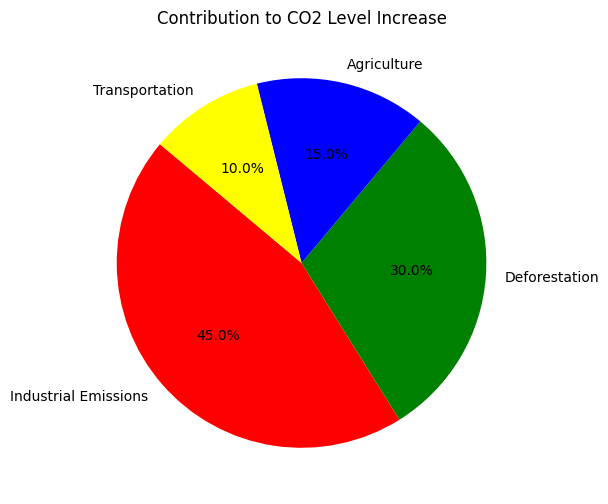

In [26]:
sources = ['Industrial Emissions', 'Deforestation', 'Agriculture', 'Transportation']
contributions = [45, 30, 15, 10]

plt.figure(figsize=(6, 6))
plt.pie(contributions, labels=sources, autopct='%1.1f%%', startangle=140, colors=['red', 'green', 'blue', 'yellow'])
plt.title('Contribution to CO2 Level Increase')
plt.show()


# 9- Grid of Subplots

C:\Users\minha\AppData\Local\Temp\ipykernel_10848\3616206621.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([sea_level_1970s, sea_level_2010s], labels=['1970s', '2010s'])


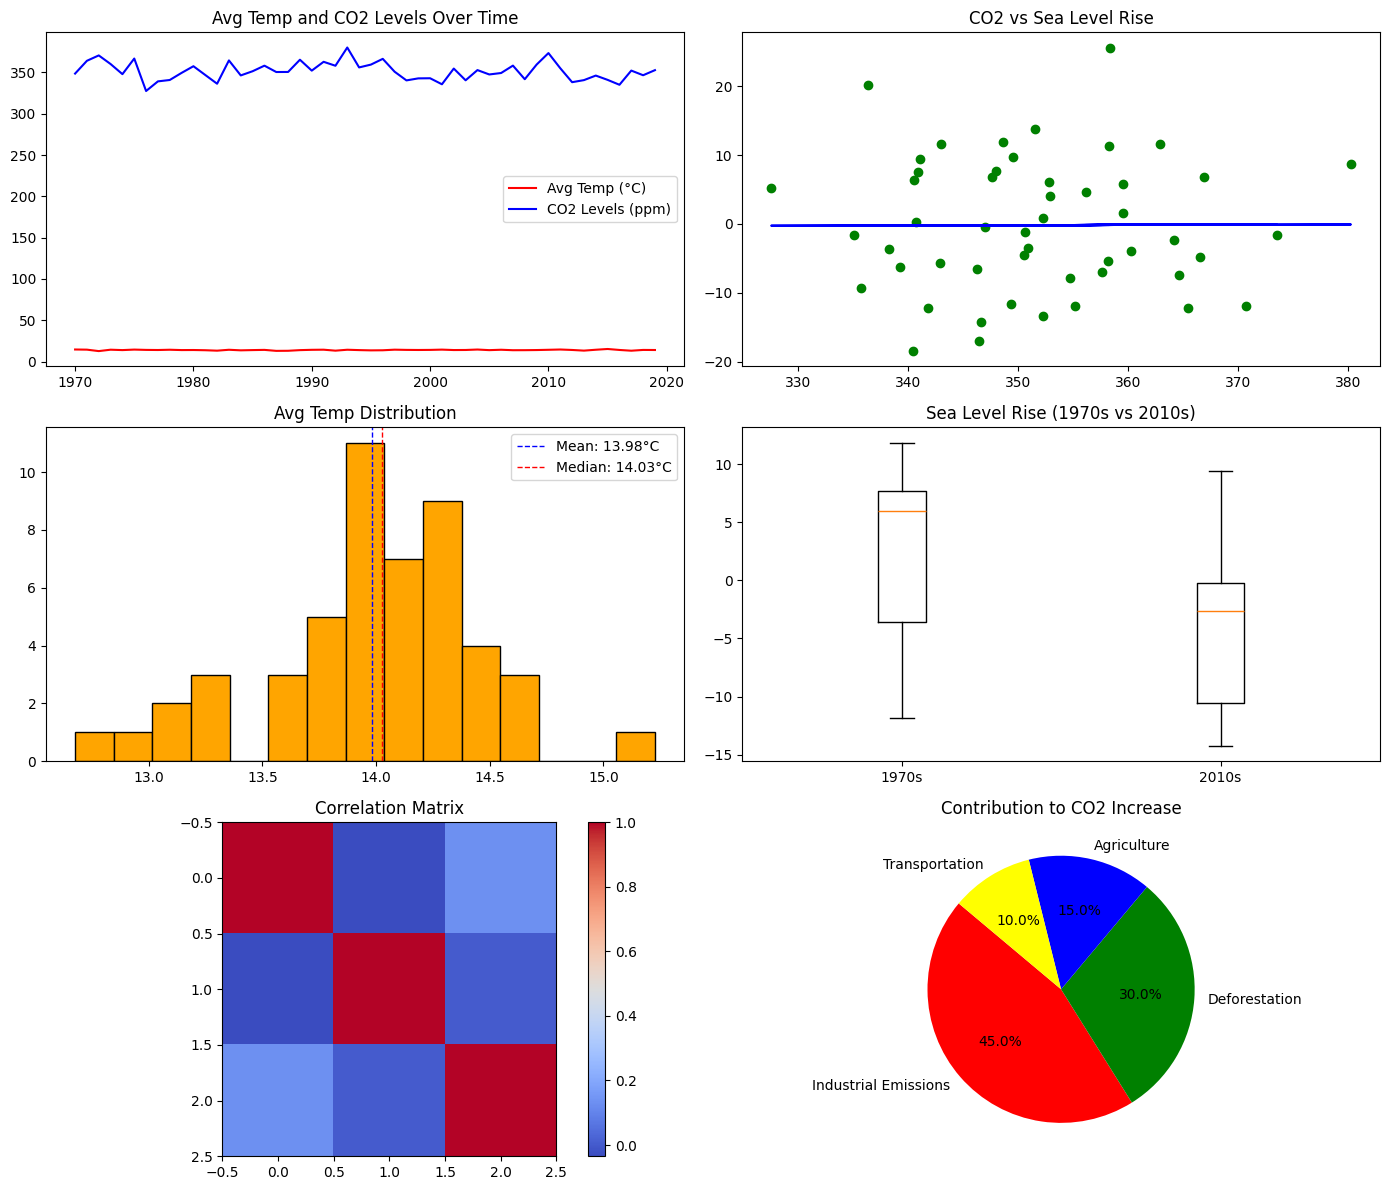

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))


axes[0, 0].plot(climate_data['Year'], climate_data['Average Temperature (°C)'], label='Avg Temp (°C)', color='red')
axes[0, 0].plot(climate_data['Year'], climate_data['CO2 Levels (ppm)'], label='CO2 Levels (ppm)', color='blue')
axes[0, 0].legend()
axes[0, 0].set_title('Avg Temp and CO2 Levels Over Time')


axes[0, 1].scatter(climate_data['CO2 Levels (ppm)'], climate_data['Average Sea Level Rise (mm)'], color='green')
axes[0, 1].plot(climate_data['CO2 Levels (ppm)'], poly_eqn(climate_data['CO2 Levels (ppm)']), color='blue')
axes[0, 1].set_title('CO2 vs Sea Level Rise')


axes[1, 0].hist(climate_data['Average Temperature (°C)'], bins=15, color='orange', edgecolor='black')
axes[1, 0].axvline(mean_temp, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_temp:.2f}°C')
axes[1, 0].axvline(median_temp, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_temp:.2f}°C')
axes[1, 0].legend()
axes[1, 0].set_title('Avg Temp Distribution')


axes[1, 1].boxplot([sea_level_1970s, sea_level_2010s], labels=['1970s', '2010s'])
axes[1, 1].set_title('Sea Level Rise (1970s vs 2010s)')


im = axes[2, 0].imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
fig.colorbar(im, ax=axes[2, 0])
axes[2, 0].set_title('Correlation Matrix')


axes[2, 1].pie(contributions, labels=sources, autopct='%1.1f%%', startangle=140, colors=['red', 'green', 'blue', 'yellow'])
axes[2, 1].set_title('Contribution to CO2 Increase')


plt.tight_layout()
plt.show()

